In [6]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [7]:
import sys
print(sys.version)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [8]:

# resize all the images to this size
IMAGE_SIZE = [100, 100]

epochs = 5
batch_size = 32

train_path = '../large_files/fruits-360-small/Training'
valid_path = '../large_files/fruits-360-small/Validation'

image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

folders = glob(train_path + '/*')

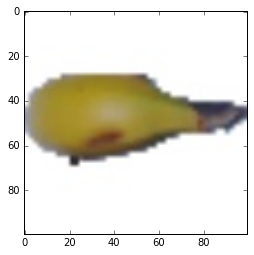

In [9]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [10]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# do not train existing weights
for layer in vgg.layers:
    layer.trainable = False

# our layer = you can add more if u want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create model object
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [12]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

In [13]:
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)


Found 1289 images belonging to 8 classes.
{'Avocado': 1, 'Mango': 5, 'Raspberry': 6, 'Banana': 2, 'Kiwi': 3, 'Apple Golden 1': 0, 'Lemon': 4, 'Strawberry': 7}


In [14]:
for k, v in test_gen.class_indices.items():
    labels[v] = k
    
print(labels)

['Apple Golden 1', 'Avocado', 'Banana', 'Kiwi', 'Lemon', 'Mango', 'Raspberry', 'Strawberry']


min: -103.939 max: 151.061


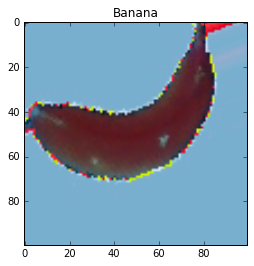

In [28]:
for x, y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

In [29]:
train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size
)

Found 3839 images belonging to 8 classes.


In [30]:
valid_generator = gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size
)

Found 1289 images belonging to 8 classes.


In [31]:
r = model.fit_generator(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    steps_per_epoch=len(image_files) // batch_size,
    validation_steps=len(valid_image_files) // batch_size)


Epoch 1/5
119/119 [==============================] - 452s - loss: 4.2116 - acc: 0.7272 - val_loss: 3.8924 - val_acc: 0.7555
Epoch 2/5
119/119 [==============================] - 487s - loss: 3.8810 - acc: 0.7557 - val_loss: 3.8856 - val_acc: 0.7589
Epoch 3/5
119/119 [==============================] - 479s - loss: 3.8325 - acc: 0.7615 - val_loss: 3.8853 - val_acc: 0.7589
Epoch 4/5
119/119 [==============================] - 478s - loss: 3.8846 - acc: 0.7583 - val_loss: 3.8596 - val_acc: 0.7605
Epoch 5/5
119/119 [==============================] - 503s - loss: 3.8359 - acc: 0.7620 - val_loss: 4.0224 - val_acc: 0.7454
